### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

# Screenshots of my tensorflow playground models can be found in the folders I uploaded. Each folder is named after the step the images correspond to.

SRT: Thank you!

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.

1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.

**F = synapse weight * neuron bias * (x1 + x2)**

Based on this equation, the model will not learn any non-linearities

SRT: Not quite, Sofi. There are a few issues here.

-- The neuron bias is additive. 
-- In general, the synapse weights will be differnent for each synapse. 
-- Also, the hidden layer connecting to the output layer will also have its own weight.
-- The output neuron could have its own bias and activation (although in this case it is linear).

-4 points.

2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*

**I still don't see any non-linearities and it does a mediocre job at modeling the data effectively**

3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?

**This one is a lot better. It modeled the data effectively in the second run**

4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

**2 hidden layers and 5 neurons give a test loss of 0.157**

SRT: Impressive! I've never gotten it that low.

5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:



- First hidden layer with 3 neurons.

**Comments:** Coverges relatively quickly. Fit is either really good or really bad. There is no in-between




- Second hidden layer with 3 neurons.

**Comments:** Converges faster than with 1 hidden layer. Fit is either really great or pretty terrible.




- Third hidden layer with 2 neurons.

**Comments:** Converges slower than the previous example, but still pretty quick. Fit is either good or bad.

## Problem 2

The first few steps of this problem are the same as last week's homework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import colormaps
import colorcet as cc
import cmasher as cmr

1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 

In [2]:
data = np.load('/Users/sofimar/vu_classes/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')

In [3]:
data = data[::10]
u_g = data['u'] - data['g']
g_r = data['g'] - data['r']
r_i = data['r'] - data['i']
i_z = data['i'] - data['z']
redshift = data['redshift']
specclass = data['specClass']

2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.

(-2.0, 2.7334380000000005)

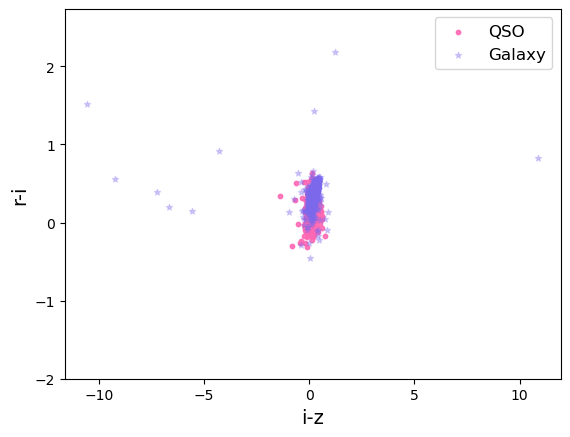

In [4]:
qso = specclass=='QSO'
gxy = specclass=='GALAXY'

plt.scatter(i_z[qso], r_i[qso], color='hotpink', label='QSO', s=10, alpha=0.9)
plt.scatter(i_z[gxy], r_i[gxy], color='mediumslateblue', label='Galaxy', alpha=0.3, s=20, marker='*')
plt.legend(fontsize=12)
plt.xlabel('i-z', fontsize=14)
plt.ylabel('r-i', fontsize=14)
plt.ylim(-2)

3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).

In [5]:
np.shape(r_i)

(5000,)

In [6]:
X = np.array((r_i,i_z))
X = X.T

label = np.empty(5000)
for i in range(5000):
    if specclass[i]=='GALAXY':
        label[i] = 0
    else:
        label[i] = 1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

4. Scale your training and testing data to prepare it for the DNN. 

normalized data (x) = (x_i-mu)/std

In [9]:
pts = [X_train, X_test, y_train, y_test]

for i in range(4):
    pts[i] = (pts[i]-np.mean(pts[i]))/np.std(pts[i])

In [13]:
Xtr_norm = pts[0]
Xte_norm = pts[1]
ytr_norm = pts[2]
yte_norm = pts[3]

SRT: I can't fault this at all. You did absolutely the correct thing. Something to note in future is that `StandardScaler` or `preprocessing.scale` exists as a tool within scikit-learn to do this for you.

5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 

In [14]:
from sklearn.neural_network import MLPClassifier

In [17]:
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(5,2), max_iter=1000, random_state=42)
clf.fit(Xtr_norm, y_train)
y_prob = clf.predict_proba(Xte_norm)

In [18]:
from sklearn.metrics import roc_curve

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

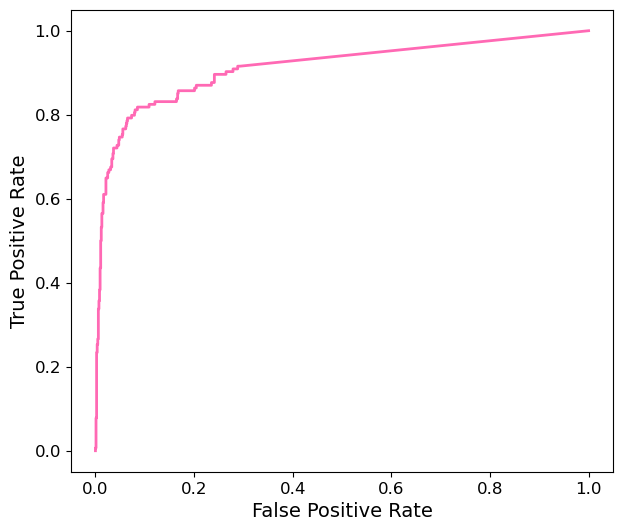

In [21]:
ytroc, yproc, thresh = roc_curve(y_test, y_prob[:,1])

plt.figure(figsize=(7,6))
plt.plot(ytroc, yproc, color='hotpink', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

SRT: Very good, Sofi.

6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [40]:
gs = GridSearchCV(param_grid={'solver': ['lbfgs', 'sgd', 'adam'],
                              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)],
                              'activation': ['relu', 'tanh'],
                              'random_state': [42],
                              'max_iter': [1000]}, n_jobs=-1, estimator=MLPClassifier())

In [41]:
gsfit = gs.fit(Xtr_norm, y_train)
print('Score: ', gsfit.best_score_)
print('Best Params:', gsfit.best_params_)

/Users/sofimar/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sofimar/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sofimar/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

Score:  0.93675
Best Params: {'activation': 'relu', 'hidden_layer_sizes': (5, 2), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}


**Best Score:** 0.93675


**Best Params:** 

- relu activation

- (5,2) hidden layer size

- lbfgs solver

SRT: Excellent.

7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [45]:
clf2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,2), max_iter=1000, random_state=42)
clf2.fit(Xtr_norm, y_train)
y_prob2 = clf2.predict_proba(Xte_norm)
ytroc2, yproc2, thresh2 = roc_curve(y_test, y_prob2[:,1])

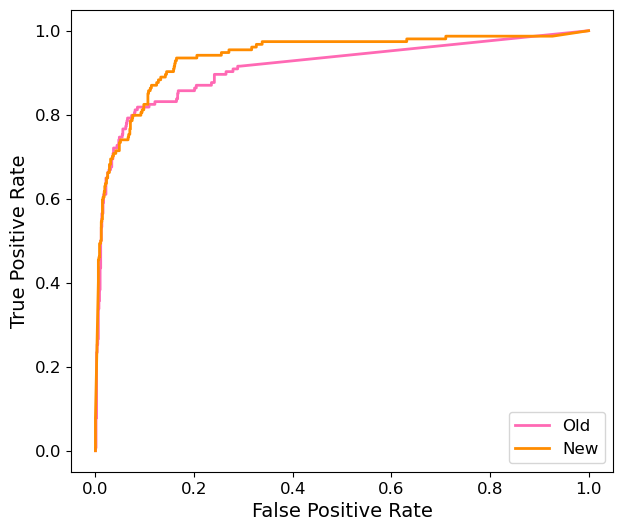

In [47]:
plt.figure(figsize=(7,6))
plt.plot(ytroc, yproc, color='hotpink', linewidth=2, label='Old')
plt.plot(ytroc2, yproc2, color='darkorange', linewidth=2, label='New')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

SRT: Well done!